# Principal Components Analysis
Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. 
- It aims to transform a high-dimensional dataset into a lower-dimensional representation while retaining most of the relevant information.

Supose we have a collections of students and its grades in the English course. Grades from 0 to 10

In [1]:
import numpy as np
import pandas as pd

grades = pd.DataFrame({"english": [8.0, 7.1, 10.0, 3.8, 1.4, 2.3]})
grades

,english
0,8.0
1,7.1
2,10.0
3,3.8
4,1.4
5,2.3


Lets represent this values in a plot

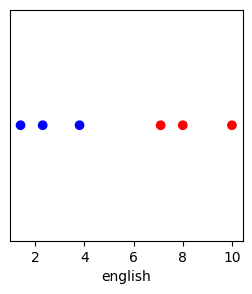

In [2]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(3,3))
ax.scatter(grades.english, np.full(len(grades), 2), c=[*'rrrbbb'])
plt.xlabel('english')
plt.yticks([])
plt.show()

It is evident that there are two distinct groups of students. The distances between students 1, 2, and 3 are more similar to each other compared to students 4, 5, and 6.

Lets add now a second course.

In [3]:
grades['math'] = [7, 6.5, 6.1, 4, 3.7, 2]
grades

,english,math
0,8.0,7.0
1,7.1,6.5
2,10.0,6.1
3,3.8,4.0
4,1.4,3.7
5,2.3,2.0


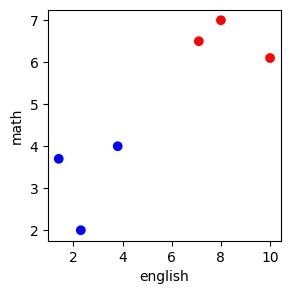

In [4]:
_, ax = plt.subplots(figsize=(3,3))
ax.scatter(grades.english, grades.math, c=[*'rrrbbb'])
plt.xlabel('english')
plt.ylabel('math')   
plt.show()

We can observe that the objects remain clustered together when considering the two dimensions. Specifically, objects 1, 2, and 3 exhibit a high degree of similarity among themselves, while objects 4, 5, and 6 also demonstrate strong similarity within their group.

Now, lets add a third course.

In [5]:
grades['history'] = [10, 9.2, 8.7, 6.4, 6.0, 5.8]
grades

,english,math,history
0,8.0,7.0,10.0
1,7.1,6.5,9.2
2,10.0,6.1,8.7
3,3.8,4.0,6.4
4,1.4,3.7,6.0
5,2.3,2.0,5.8


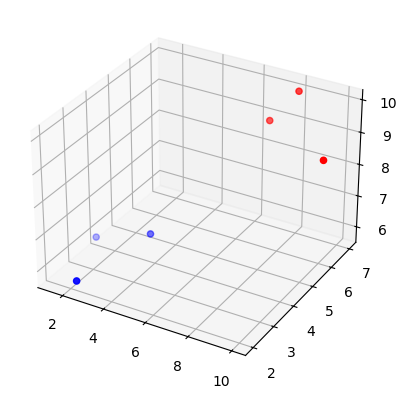

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
ax.scatter(grades.english, grades.math, grades.history, c=[*'rrrbbb'])
plt.show()

As you can see, the same objects keep clustered together.

Lets add a new course.

In [7]:
grades['chemistry'] = [9.3, 8.4, 7.9, 4.3, 4.2, 3.9]
grades

,english,math,history,chemistry
0,8.0,7.0,10.0,9.3
1,7.1,6.5,9.2,8.4
2,10.0,6.1,8.7,7.9
3,3.8,4.0,6.4,4.3
4,1.4,3.7,6.0,4.2
5,2.3,2.0,5.8,3.9


**Now we are no longer able to represent data in a plot, because we cannot see a 4D space.**

Principal Components Analysis, or PCA, allows to represent a dataset with many dimensions into a new dataset with reduced number of dimensions, but keeping the most important information.

<img src='images/PCA.png'>

- The principal components represent new orthogonal axes that capture the maximum variance in the data.
- The main principal component is the line which, when all points are projected over it, their spread is the largest.

## Why PCA works?

If you have a point cloud in 2D and I let you pick any line and project the points, but then you will never have access back to original data, which line would you pick?
 
In this example, it allows to represent the 4D information of grades into a 1D representation, which we can plot and understand.

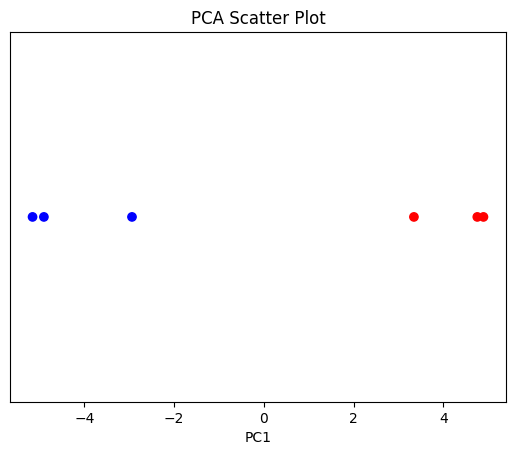

In [8]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=1)  # Select the number of components you want to keep
principal_components = pca.fit_transform(grades)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1'])

# Plot the data in a 2D scatter plot
plt.scatter(principal_df['PC1'], np.full(len(grades), 2), c=[*'rrrbbb'])
plt.xlabel('PC1')
plt.yticks([])
plt.title('PCA Scatter Plot')
plt.show()

Lets see the explained variance of the principal component

In [9]:
pca.explained_variance_

array([23.4121696])

The variance of all the original features is:

In [10]:
grades.var()

english      11.794667
math          3.813667
history       3.345667
chemistry     6.026667
dtype: float64

With a total of:

In [11]:
grades.var().sum()

24.980666666666664

So, the explained variance ratio is:

In [12]:
pca.explained_variance_ / grades.var().sum(), pca.explained_variance_ratio_

(array([0.93721156]), array([0.93721156]))

Lets try now with two principal components

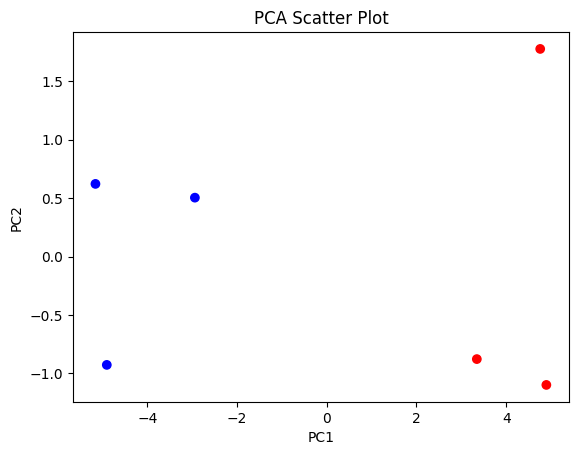

In [13]:
# Perform PCA
pca = PCA(n_components=2)  # Select the number of components you want to keep
principal_components = pca.fit_transform(grades)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plot the data in a 2D scatter plot
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=[*'rrrbbb'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

Lets see now the explained variance

In [14]:
print(pca.explained_variance_)
pca.explained_variance_ratio_

[23.4121696   1.32597165]


array([0.93721156, 0.05307991])

Lets try with 3 PC

In [15]:
# Perform PCA
pca = PCA(n_components=3)  # Select the number of components you want to keep
principal_components = pca.fit_transform(grades)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

pca.explained_variance_ratio_

array([0.93721156, 0.05307991, 0.00926164])

For showing PCA in a real live example, we will use the digit image dataset that we used before. Now we represent each image as a continuous collection of values.

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Define transformations to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor image with mean and standard deviation
])

# Download and load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

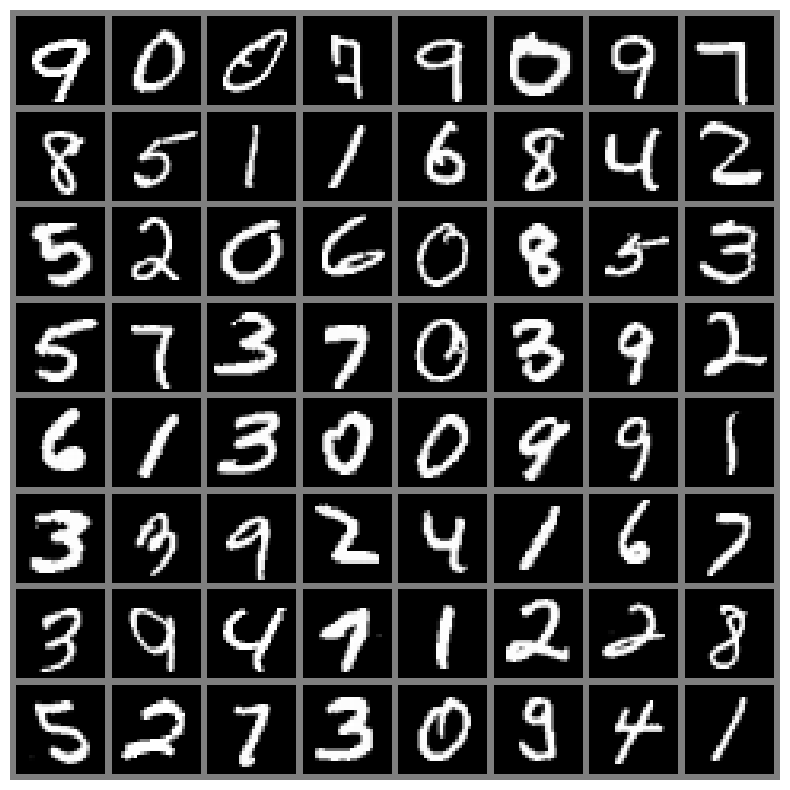

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show images with labels
def imshow_with_labels(img, labels):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    plt.axis('off')
    plt.show()

# Get some random training images and their labels
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images with labels
imshow_with_labels(torchvision.utils.make_grid(images), labels)

In [18]:
trainset.data.shape

torch.Size([60000, 28, 28])

In a previous section, we tranformed all the images into a single vector of 28 * 28 = 784 values, and then use that information for classification.
- Are all these features really necessary, or is there redundant information that can be removed?

In [19]:
plain_images = trainset.data.view(trainset.data.shape[0], -1)
plain_images.shape

torch.Size([60000, 784])

In [20]:
data = pd.DataFrame(plain_images.numpy())
y_train = trainset.targets.numpy()

pca = PCA(n_components=2) 
principal_components = pca.fit_transform(data)
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

In [21]:
total_variance = data.var().sum()
print("Total variance", total_variance)
print("Explained variance per PC:", pca.explained_variance_)
print("- relative:", pca.explained_variance_ratio_)

Total variance 3428502.574780269
Explained variance per PC: [332724.66744657 243283.9390705 ]
- relative: [0.09704664 0.07095924]


Remember, there are 784 features!!!

Now, lets plot the PCs

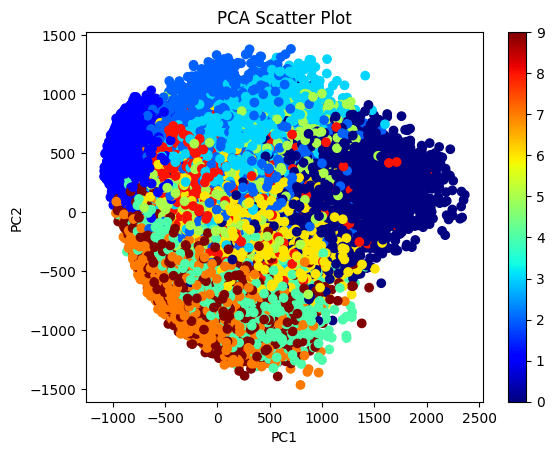

In [22]:
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=y_train, cmap="jet")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.colorbar()
plt.show()

Lets filter some classes in order to analyze the components.

In [23]:
together = principal_df.copy()
together['digit'] = y_train

def plot_digits(digits):
    to_show = together[together.digit.isin(digits)]
    plt.scatter(to_show.PC1, to_show.PC2, c=to_show.digit, cmap="jet")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Scatter Plot')
    plt.colorbar()
    plt.show()

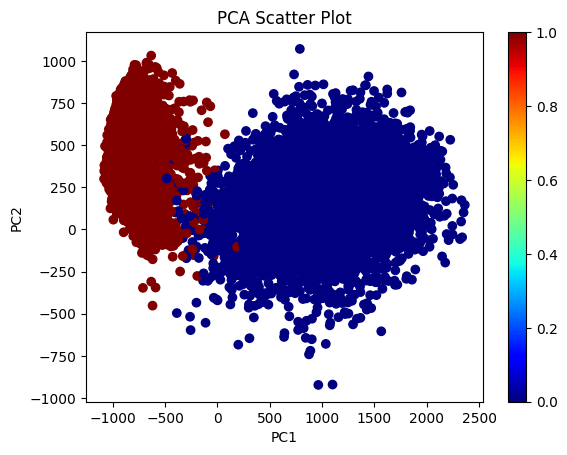

In [24]:
plot_digits({0, 1})

- It separates quite well 0 and 1
- It is more variety in the 0 than in the ones

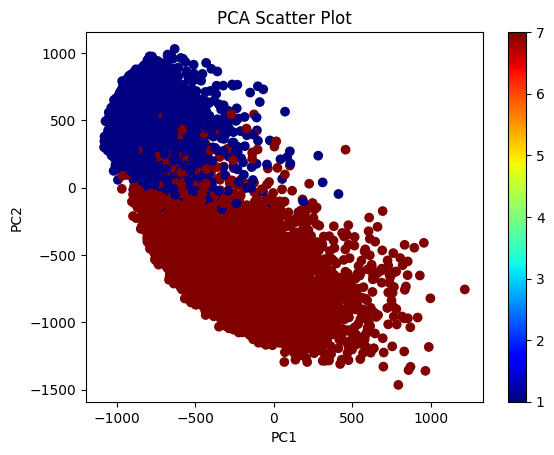

In [25]:
plot_digits({1, 7})

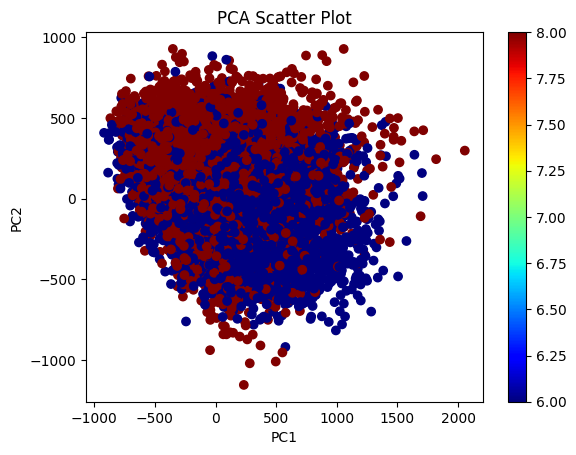

In [26]:
plot_digits({6, 8})

Not quite well separated.

If we add more than three components, we can get a more accurate representation, but we can no longer visualize it.

In [27]:
# Perform PCA
pca = PCA(n_components=10)  
principal_components = pca.fit_transform(data)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=[f'PC{n}' for n in range(1, 11)])

In [28]:
total_variance = data.var().sum()
print("Total variance", total_variance)
print("Explained variance per PC:", pca.explained_variance_)
relative_var = pca.explained_variance_ratio_
print("- relative:", relative_var)
print("- cumulative", np.cumsum(relative_var))

Total variance 3428502.574780269
Explained variance per PC: [332724.66744657 243283.9390705  211507.36705827 184776.38586219
 166926.83131066 147844.96167532 112178.20271178  98874.42962709
  94696.24905304  80809.82453195]
- relative: [0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001]
- cumulative [0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498 ]


So, taking only 10 principal components, I am able to explain almost half of the total variance of the original database with 784 features.

Sumarizing:
- PCA allows to transform datasets from higher dimensions to lower dimensions, keeping the most important information (related to variance)
- It is a powerfull tool for visualization (and for other methods too!)